In [2]:
import pandas as pd
df = pd.read_csv('Bankruptcy_data_Final.csv')

In [3]:
df.shape

(92872, 13)

In [4]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EPS,92867.0,-14.461355,2195.467288,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92625.0,-2.631237,121.610921,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92625.0,-29.537274,677.230667,-7.968200e+04,-0.640000,0.070000,0.310000,140.58
Productivity,92625.0,-1.222870,35.885556,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92846.0,1.345316,253.038093,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92625.0,1.053613,2.115945,-3.159000e+01,0.390000,0.830000,1.390000,276.38
Operational Margin,87315.0,-7.915485,214.460079,-3.017570e+04,-0.030000,0.060000,0.140000,394.47
Return on Equity,92864.0,-2.112382,352.596902,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00
Market Book Ratio,92815.0,358.506265,26063.637981,-3.151500e+06,11.200000,58.280000,240.140000,3455419.33
Assets Growth,86171.0,1.294075,73.769522,-1.000000e+00,-0.052596,0.051844,0.192062,14231.00


In [7]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns

## Analysis with Pandas Profiling

In [8]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(df, title='Report - Pandas Profiling', html={'style':{'full_width':True}})
profile

TypeError: ignored

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(df['BK'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [11]:
df['BK'].value_counts()

0    92314
1      558
Name: BK, dtype: int64

#### Remove duplicates

In [12]:
df.shape

(92872, 13)

In [13]:
df = df.drop_duplicates()
df.shape

(92845, 13)

In [14]:
df = df.dropna()
df.shape

(81185, 13)

In [15]:
np.isnan(df)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,False,False,False,False,False,False,False,False,False,False,False,False,False
92868,False,False,False,False,False,False,False,False,False,False,False,False,False
92869,False,False,False,False,False,False,False,False,False,False,False,False,False
92870,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
np.isnan(df['Assets Growth']).value_counts()

False    81185
Name: Assets Growth, dtype: int64

#### Train_Test_Split

In [17]:
X = df.drop('BK', axis=1) 
y = df['BK']

In [18]:
from sklearn.model_selection import train_test_split
# stratify will preserve the proportion of the target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=97, test_size = 0.20)

In [19]:
from imblearn.over_sampling import SMOTE
over = SMOTE(ratio = 0.5)
X_train, y_train = over.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
plt.figure(figsize=(8,6))
sns.countplot(df['BK'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn import datasets, metrics, model_selection, svm


### 3. Running RFECV

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [24]:
RFC = RandomForestClassifier(random_state=101)
RFECV = RFECV(estimator=RFC, step=1, cv=StratifiedKFold(10), scoring='f1')
RFECV.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1', step=1, verbose=0)

In [26]:
print('Optimal number of features: {}'.format(RFECV.n_features_))

Optimal number of features: 12


In [27]:
RFECV.grid_scores_

array([0.92110944, 0.92232448, 0.93089911, 0.95791857, 0.96467001,
       0.97063232, 0.97553358, 0.97842706, 0.98156854, 0.98349013,
       0.98418853, 0.98475274])

**Plot the accuracy obtained with every number of features used:**

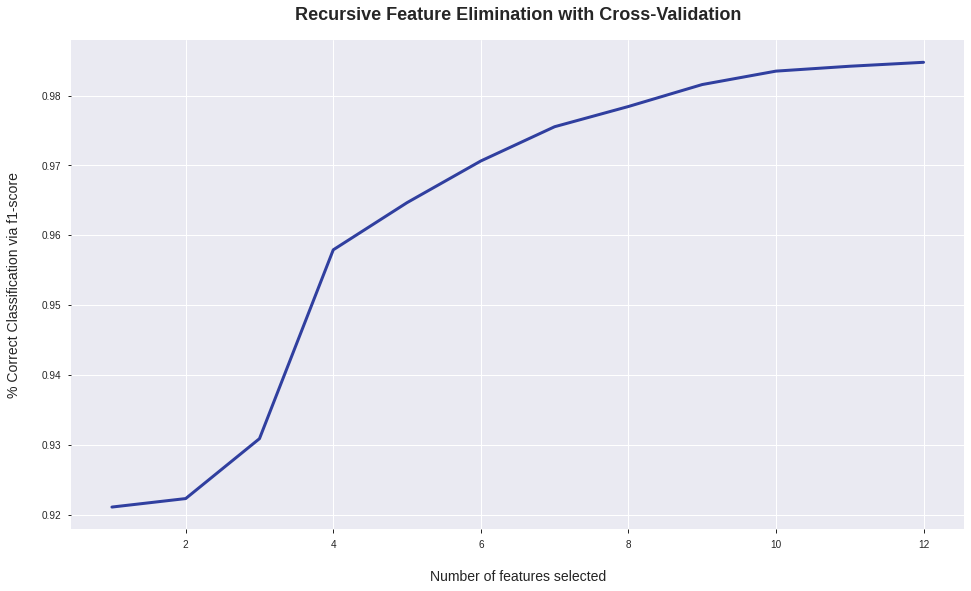

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline


P1 = plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification via f1-score', fontsize=14, labelpad=20)
plt.plot(range(1, len(RFECV.grid_scores_) + 1), RFECV.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [73]:
P1.savefig('Recursive Feature Elimination with Cross-Validation.pdf') 

In [38]:
X_train.shape

(121068, 12)

 Let's print out which features are considered to be least important and drop them with this snippet:

In [39]:
type(X_train)

numpy.ndarray

Let's bring back X_train into DataFrame form after it was transformed into numpy array by using StandardScaler.

In [40]:
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179
1,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524
2,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890
3,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030
4,1.50,0.37,0.16,0.11,0.34,1.41,0.08,0.08,7.82,0.132458,0.231681,0.076978


In [53]:
df.columns[:12]

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth',
       'Employee Growth'],
      dtype='object')

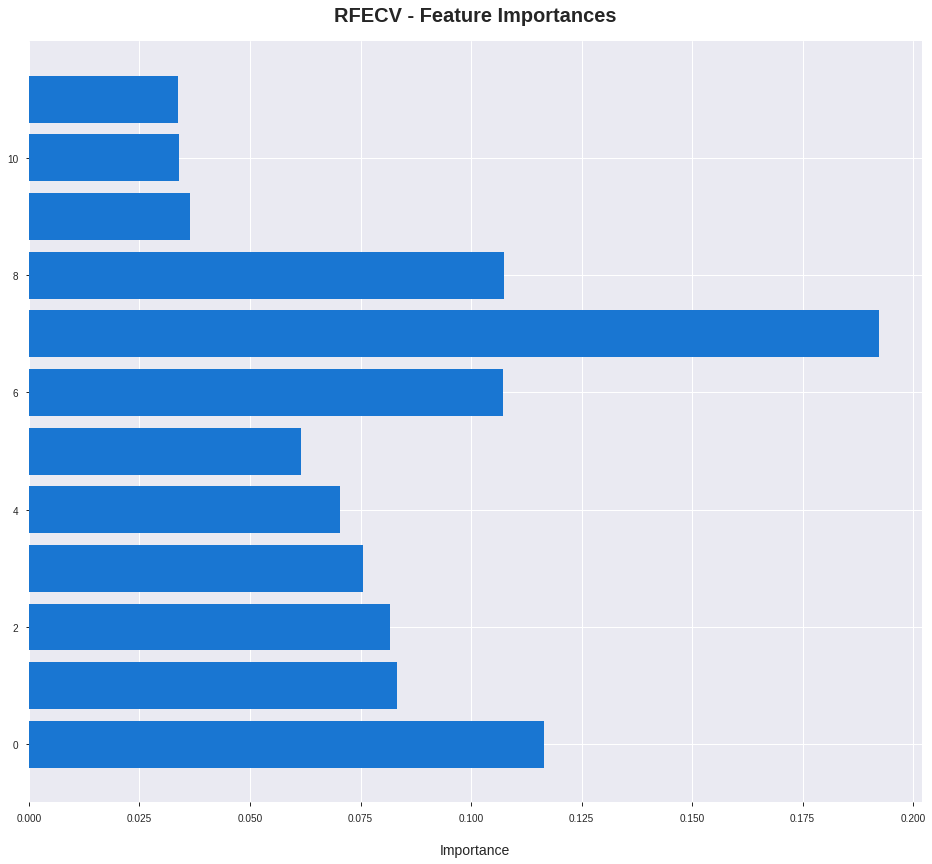

In [74]:
# Let's measure the importances of the features
dset = pd.DataFrame()
dset['attr'] = X_train_df.columns
dset['importance'] = RFECV.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


P2 = plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [75]:
P2.savefig('Feature Importances.pdf') 

**# Let's measure the importances of the features**

In [61]:
feature_names = X_train_df.columns

imp = pd.DataFrame({'Feature': feature_names, 'Importance': RFECV.estimator_.feature_importances_})
imp = imp.sort_values('Importance', ascending=False)
imp.head()

,Feature,Importance
7,7,0.192335
0,0,0.116437
8,8,0.107367
6,6,0.107188
1,1,0.083351


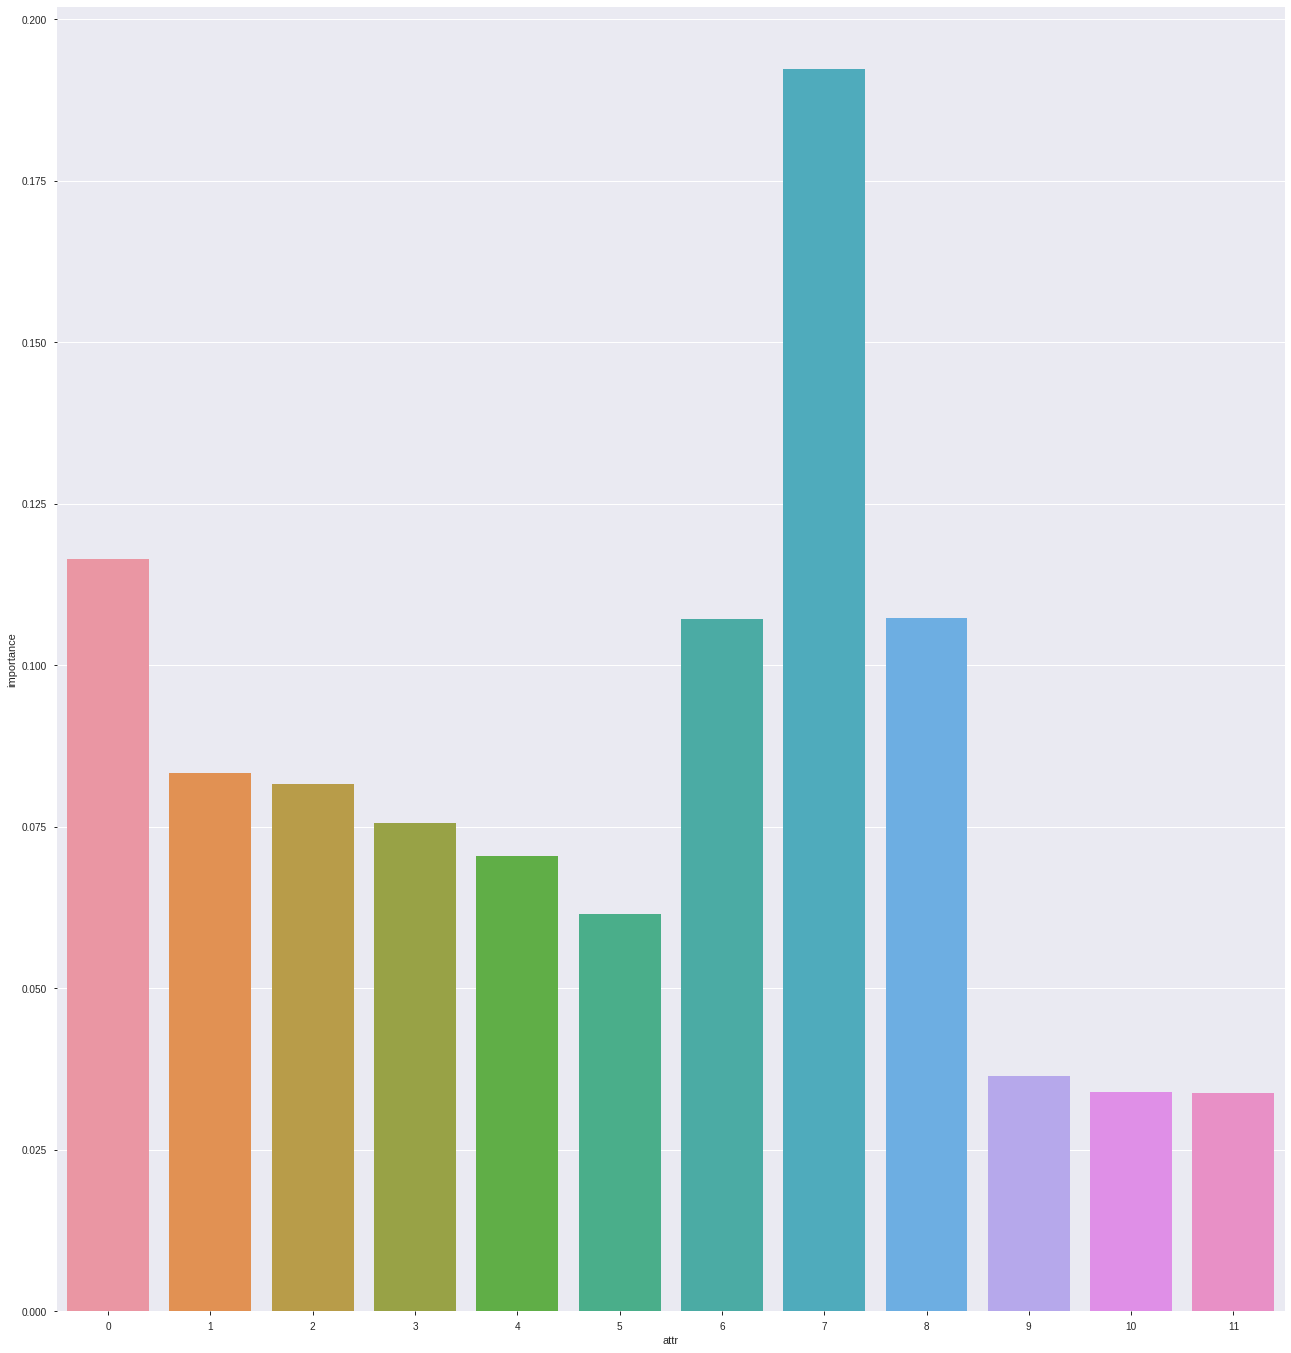

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(22, 24))
sns_plot = sns.barplot(y=dset['importance'], x=dset['attr'], data=imp)

In [76]:
fig2 = sns_plot.get_figure()
fig2.savefig('Colored Feature Importances.pdf', dpi=300)